In [ ]:
#Installing packages
packages<-c("leaflet", "htmlwidgets")
sapply(packages, install.packages, character.only=TRUE)
sapply(packages, require, character.only=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘terra’, ‘gridExtra’, ‘crosstalk’, ‘htmlwidgets’, ‘leaflet.providers’, ‘raster’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



$leaflet
NULL

$htmlwidgets
NULL

Loading required package: leaflet

Loading required package: htmlwidgets



leaflet htmlwidgets 
       TRUE        TRUE

In [ ]:
#libraries
library('tidyverse')
library('googledrive')
library('htmlwidgets')
library('leaflet')

In [ ]:
#configure google drive and load csv

drive_deauth()
drive_download(as_id("1FF2leVpbFjKMKeEjkn_7u--jZwf_jfYNcpHuucoCyV0"), overwrite = TRUE, type = "csv")
trash <- as.data.frame(read.csv("trash_cans.csv")) %>% drop_na(c("longitude","latitude"))

File downloaded:

• trash_cans <id: 1FF2leVpbFjKMKeEjkn_7u--jZwf_jfYNcpHuucoCyV0>

Saved locally as:

• trash_cans.csv



Let's look at a map of trash cans!

In [6]:
#leaflet - needs to be downloaded and opened in a browser
trash_html <- trash %>%
  leaflet() %>%
  addTiles() %>%
  addProviderTiles(providers$Esri.WorldImagery) %>%
  addProviderTiles(providers$Esri.NatGeoWorldMap, group = "NatGeo") %>%
  addCircleMarkers(popup = trash$Company,
                    lng = trash$longitude,
                    lat = trash$latitude,
                    label = trash$Company,
                    radius = trash$Number,
                    color = "gold",
                    fillColor = "red",
                    fillOpacity = 0.7,
                    labelOptions = labelOptions(noHide = T, direction = "bottom",
                    offset=c(0,-20), textOnly = TRUE)) %>%
addLayersControl(
      baseGroups = c("OSM", "CartoDB", "NatGeo", "ESRI"),
      options = layersControlOptions(collapsed = FALSE)) %>%
      addMiniMap(zoomLevelOffset = -4) %>%
      addScaleBar()
saveWidget(trash_html, file = "trash_cans.html")

Here is a picture of my research assistant for this exercise.
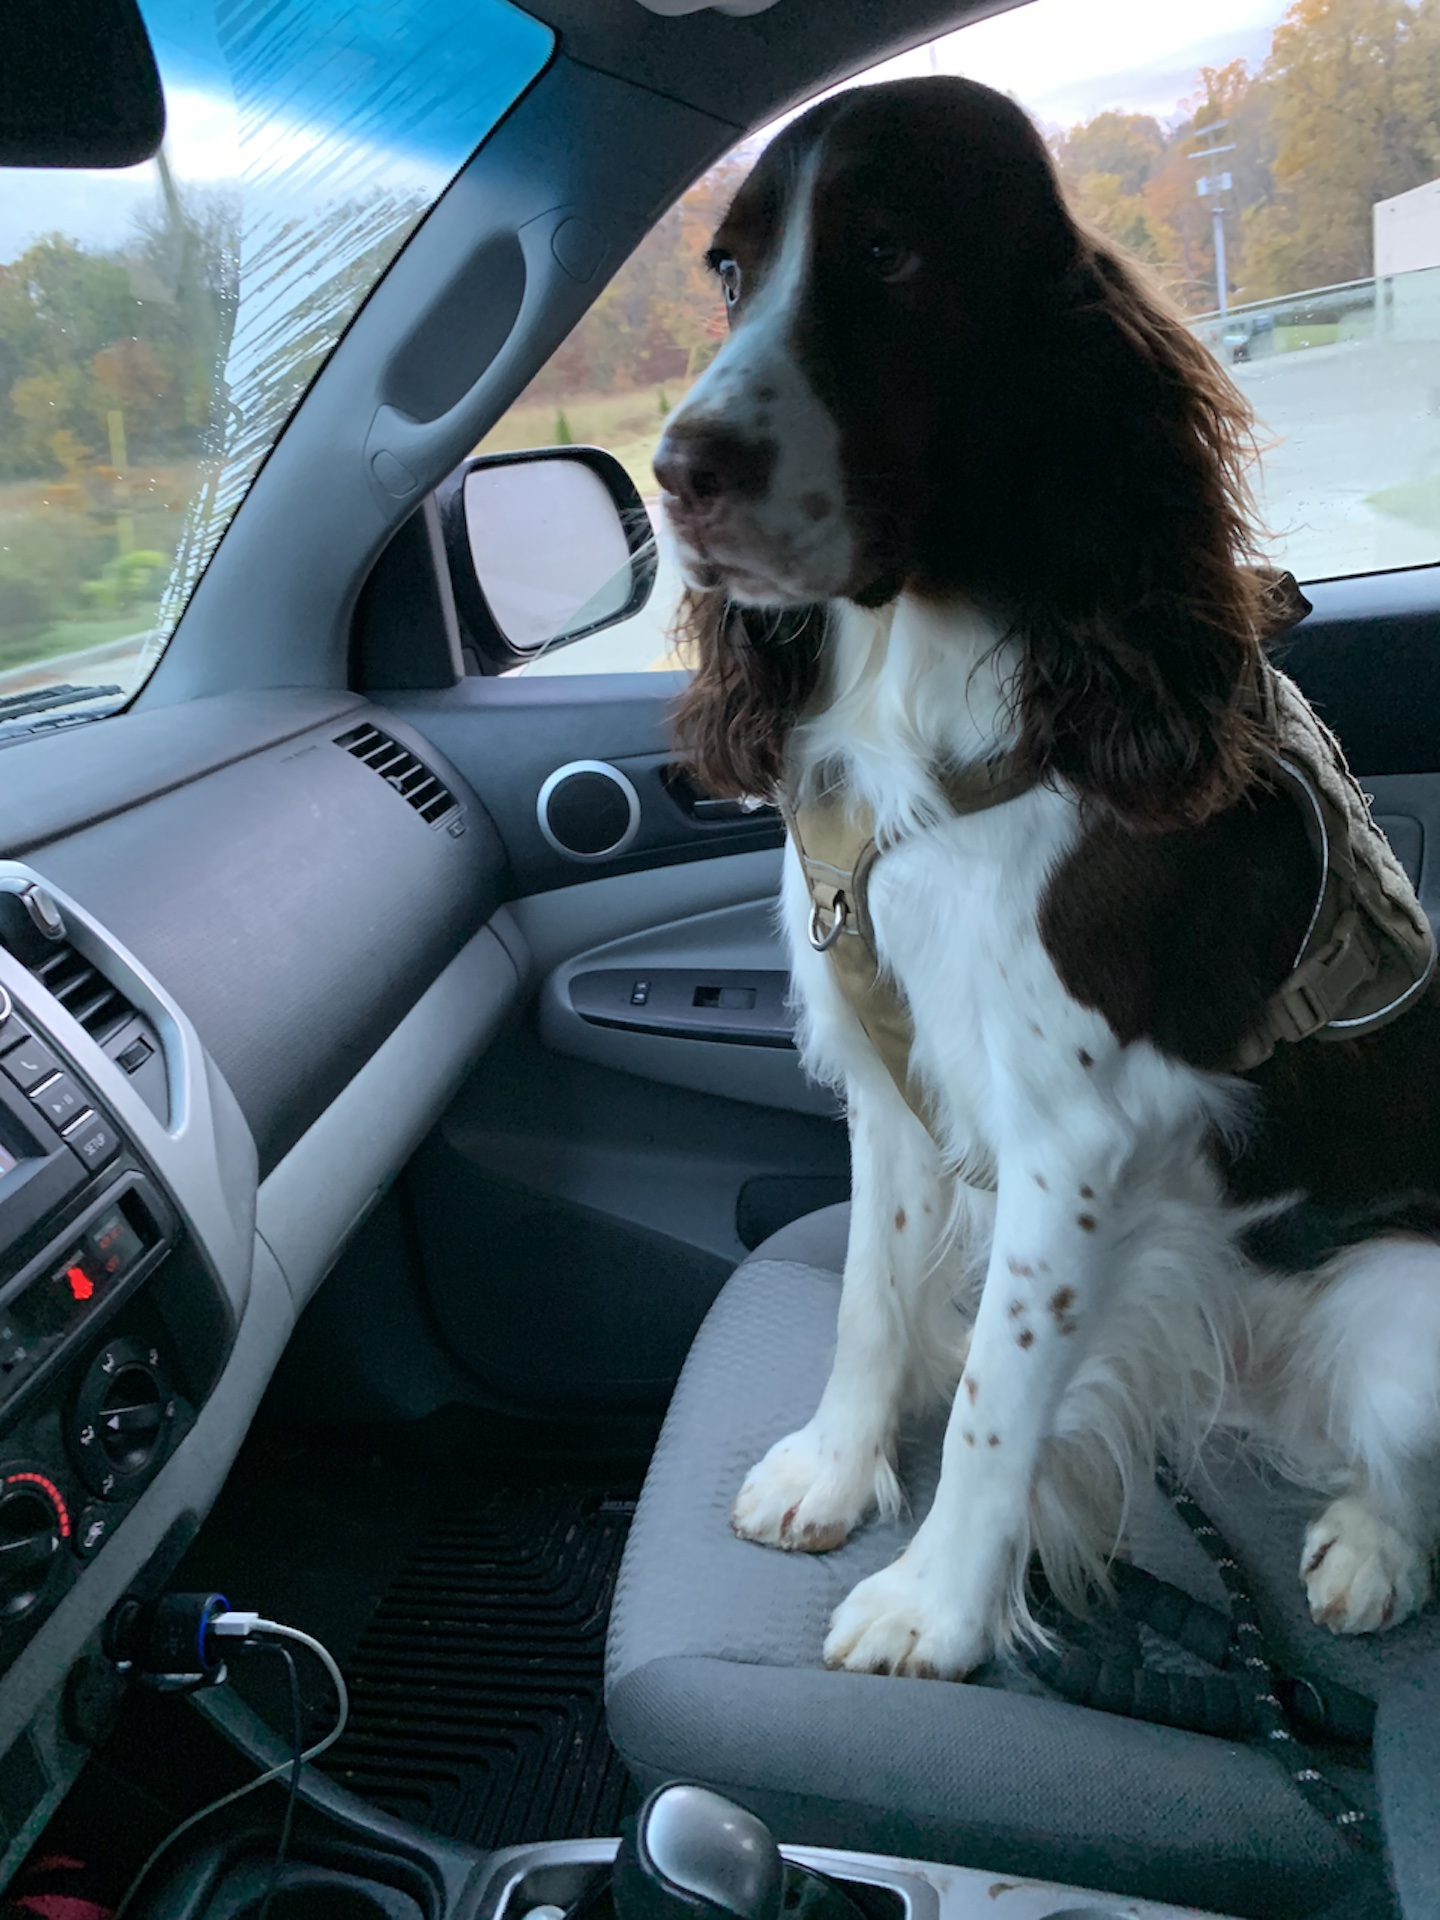
